<a href="https://colab.research.google.com/github/nadiduno/BootCampDataScience/blob/main/cienciadedados2alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By [Nadi Duno](https://www.linkedin.com/in/nadiduno/)  </💜> Abril-2023

Importando as Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importando os dados

In [ ]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)
dados

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês


Exploração inicial dos dados
describe: Quantidades, media, minimo máximo, quartis (25 - 50 - 75 %) para variáveiss numéricas

In [ ]:
dados.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


describe(include='all') para variável Categoricas não só numéricas

In [ ]:
dados.describe(include='all')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
count,6574,9996,10008,10008.000000,10008.000000,10008.000000,10008.000000,10008
unique,3130,701,1,NaN,NaN,NaN,NaN,1041
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000
freq,24,409,10008,NaN,NaN,NaN,NaN,182
mean,NaN,NaN,NaN,442.300659,3.483114,3.879097,4.097222,NaN
std,NaN,NaN,NaN,7515.379389,1.064200,1.988467,2.824014,NaN
min,NaN,NaN,NaN,10.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,173.000000,3.000000,2.000000,2.000000,NaN
50%,NaN,NaN,NaN,290.000000,3.000000,4.000000,4.000000,NaN
75%,NaN,NaN,NaN,460.250000,4.000000,5.000000,5.000000,NaN


In [ ]:
dados[['Valor','Rua','Bairro']].describe()

,Valor,Rua,Bairro
count,10008,6574,9996
unique,1041,3130,701
top,R$ 2.500.000,Rua Alberto Faria,Alto de Pinheiros
freq,182,24,409


Achar a media do valor do imóvel que estão em vendas (não em alquiler). Primeiro vamos analizar os dados

In [ ]:
atributo='Valor'
dados[atributo]

0                                R$ 7.000.000
1                                R$ 3.700.000
2                                  R$ 380.000
3                                  R$ 685.000
4                                  R$ 540.000
                         ...                 
10003                              R$ 665.000
10004                            R$ 2.300.000
10005                            R$ 1.050.000
10006    R$ 2.200\n                      /Mês
10007                              R$ 270.000
Name: Valor, Length: 10008, dtype: object

 R$ 7.000.000
 R$ 2.200\n                      /Mês
 Tem varios formatos
 

split, separa onde encontra espaço
dados[atributo].split() vai da erro porque todos os registros são diferentes
Usar str antes do split
dados[atributo].split()

In [ ]:
dados[atributo].str.split()

0          [R$, 7.000.000]
1          [R$, 3.700.000]
2            [R$, 380.000]
3            [R$, 685.000]
4            [R$, 540.000]
               ...        
10003        [R$, 665.000]
10004      [R$, 2.300.000]
10005      [R$, 1.050.000]
10006    [R$, 2.200, /Mês]
10007        [R$, 270.000]
Name: Valor, Length: 10008, dtype: object

expand cria uma tabela com estos campos

In [ ]:
dados[atributo].str.split(expand=True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


Creo uma tabela com 3 columnas, Vamos explorar cada columna

In [ ]:
dados[atributo].str.split(expand=True)[0].unique()

array(['R$'], dtype=object)

In [ ]:
dados[atributo].str.split(expand=True)[1].unique()

In [ ]:
dados[atributo].str.split(expand=True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

Guardamos estas novas columnas no dataframe Dados
com nomes de Moeda, Valor Anuncio, Tipo Anuncio

In [ ]:
atributo2='Moeda'
atributo3='Valor_anuncio'
atributo4='Tipo_anuncio'
dados[[atributo2, atributo3, atributo4]] = dados[atributo].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


Ver Comunas especificas do Data Frame

In [ ]:
dados[[atributo, atributo3]]

,Valor,Valor_anuncio
0,R$ 7.000.000,7.000.000
1,R$ 3.700.000,3.700.000
2,R$ 380.000,380.000
3,R$ 685.000,685.000
4,R$ 540.000,540.000
...,...,...
10003,R$ 665.000,665.000
10004,R$ 2.300.000,2.300.000
10005,R$ 1.050.000,1.050.000
10006,R$ 2.200\n /Mês,2.200


Já tenho o valor do anuncio
Agora vamos a verfificar si é um tipo de dado numérico

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6574 non-null   object
 1   Bairro         9996 non-null   object
 2   Cidade         10008 non-null  object
 3   Metragem       10008 non-null  int64 
 4   Quartos        10008 non-null  int64 
 5   Banheiros      10008 non-null  int64 
 6   Vagas          10008 non-null  int64 
 7   Valor          10008 non-null  object
 8   Moeda          10008 non-null  object
 9   Valor_anuncio  10008 non-null  object
 10  Tipo_anuncio   852 non-null    object
dtypes: int64(4), object(7)
memory usage: 860.2+ KB


Retorna object (tem string) vamos a converter a numérico

Usamos replace para tirar o ponto 
e astype para convertir a flotante

In [ ]:
dados[atributo2].str.replace('.','').astype(float)

<ipython-input-40-e31b7dc98383>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados[atributo2].str.replace('.','').astype(float)


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10003     665000.0
10004    2300000.0
10005    1050000.0
10006       2200.0
10007     270000.0
Name: Valor_anuncio, Length: 10008, dtype: float64

Guardamos no DataFrame em uma nova columna chamada Valor Real

In [ ]:
atributo5='Valor_real'
dados[atributo5] = dados[atributo3].str.replace('.','').astype(float)
dados

<ipython-input-45-c859f6f57670>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados[atributo5] = dados[atributo3].str.replace('.','').astype(float)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_real
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.0
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.0
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.0
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,R$ 2.200\n /Mês,R$,2.200,/Mês,2200.0


Tinha um valor sujo, fuimos depurando ate separa os string dos numero, depois, tiramos os pontos e convertimos um valor numérico flotante

Bora ver

In [ ]:
dados[[atributo, atributo3,atributo5]]

,Valor,Valor_anuncio,Valor_real
0,R$ 7.000.000,7.000.000,7000000.0
1,R$ 3.700.000,3.700.000,3700000.0
2,R$ 380.000,380.000,380000.0
3,R$ 685.000,685.000,685000.0
4,R$ 540.000,540.000,540000.0
...,...,...,...
10003,R$ 665.000,665.000,665000.0
10004,R$ 2.300.000,2.300.000,2300000.0
10005,R$ 1.050.000,1.050.000,1050000.0
10006,R$ 2.200\n /Mês,2.200,2200.0


Separar os anuncios de aquler com os de vendas segundo o Tipo de Anuncio (atributo4)

In [ ]:
dados[atributo4]

0        None
1        None
2        None
3        None
4        None
         ... 
10003    None
10004    None
10005    None
10006    /Mês
10007    None
Name: Tipo_anuncio, Length: 10008, dtype: object

Os None são os que estão em venta, os que tem em Tipo de Anuncio, por mês, por ano são para alquiles

É po isso que seleccionamos os que são None com ISNULL

In [ ]:
dados_venda=dados[dados[atributo4].isnull()]
dados_venda

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_real
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.0
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.0
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.0
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.0


#AGORA SIM 
Media das vendas

In [ ]:
dados_venda[atributo5].mean()

3052202.9554390563

Uma visão geral dos dados

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dados_venda.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_real
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


#Plotagem dos dados

<Axes: xlabel='Valor_real', ylabel='Count'>

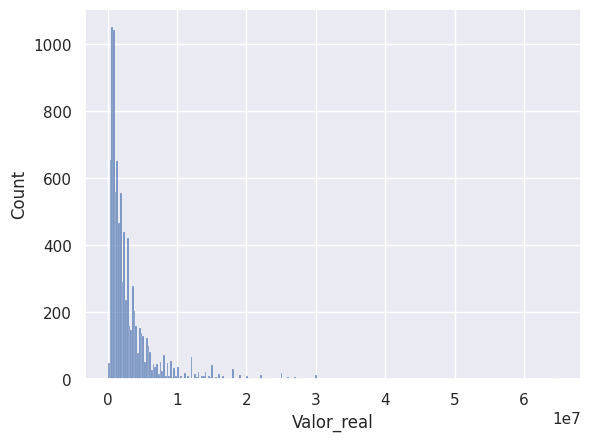

In [ ]:
sns.histplot(data = dados_venda, x = atributo5)

#Setando o gráfico para melhorar a visual, mezclando duas bibliotecas

##import matplotlib.pyplot as plt
##import seaborn as sns

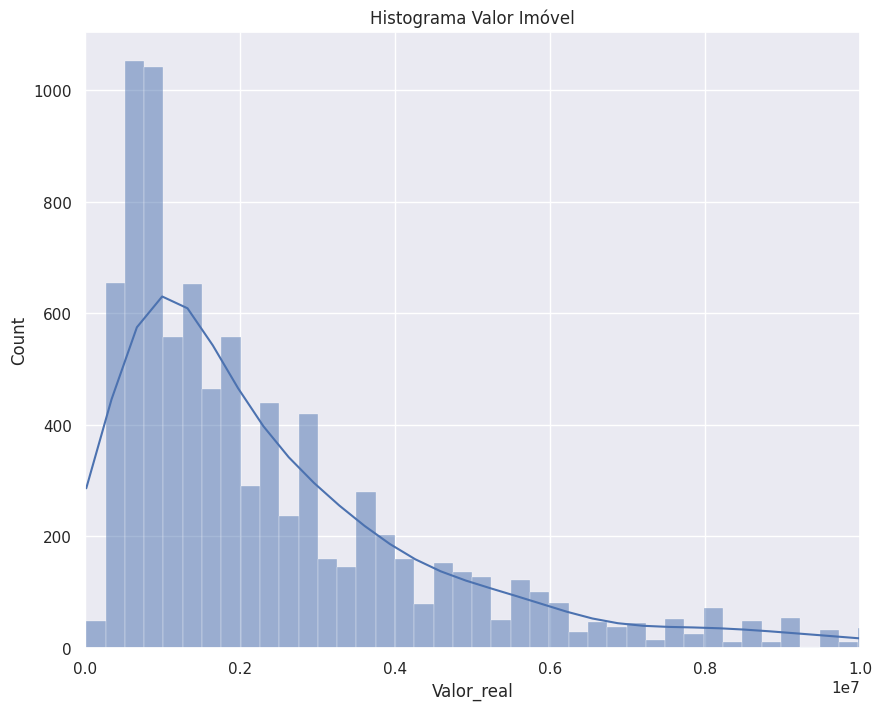

In [ ]:
sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_venda, x = atributo5, kde = True)
ax.set_title("Histograma Valor Imóvel")
plt.xlim((-50, 10000000))
plt.show()

#Desafio 2

- Criar uma escala de valores em milhões
- Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)
- Preço do metro quadrado por bairro e plotar em um gráfico ideal
- Explorar as bibliotecas de visualizações e colocar as suas conclusão
- Pesquisar um visualização para analisar os quartis, mediana e outliers